In [1]:
import matplotlib.pyplot as plt
from time import time
from simfunctions import *

# Lotka-Volterra

X rabbits
Y foxes

$$ X \xrightarrow{k_1} 2X $$
$$ X + Y \xrightarrow{k_2, k_3} 2Y $$
$$ Y \xrightarrow{k_4} \emptyset $$

with parameter $k_1 = 1.1, k_2 = 0.4, k_3 = 0.1, k_4 = 0.4$.

In [42]:
def rate1(X):
    rate = X[0]
    if rate > 0:
        return rate
    else:
        return 0

def rate2(X):
    rate = X[0]*X[1]
    if rate > 0:
        return rate
    else:
        return 0

def rate3(X):
    rate = X[1]
    if rate > 0:
        return rate
    else:
        return 0
    
    
# Model Parameters
drift = [rate1, rate2, rate3]
S_matrix = np.array([[1, 0], [-1, 1], [0, -1]])  # Stoichiometry matrix
c = np.array([10, 0.01, 10])  # Reaction rates
X0 = np.array([1000, 1000])  # Initial state
T = 0.02  # Total time


## SSA

In [43]:
n_runs = 10
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_ssa = next_reaction(drift, S_matrix, c, X0, T)
    runs.append(X)
    
x_ssa = np.mean(np.array(runs), axis=0)


0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed


In [44]:
np.array(runs)

array([[[1000, 1000],
        [ 999,  999],
        [1000,  999],
        ...,
        [ 998, 1018],
        [ 998, 1017],
        [ 998, 1016]],

       [[1000, 1000],
        [1000,  999],
        [ 998, 1001],
        ...,
        [1025,  981],
        [1023,  983],
        [1023,  983]],

       [[1000, 1000],
        [ 998, 1000],
        [ 997, 1001],
        ...,
        [1015,  960],
        [1015,  960],
        [1015,  959]],

       ...,

       [[1000, 1000],
        [1000,  999],
        [1000,  999],
        ...,
        [1009,  991],
        [1009,  992],
        [1009,  992]],

       [[1000, 1000],
        [1000, 1000],
        [1000, 1000],
        ...,
        [1026,  991],
        [1027,  990],
        [1027,  989]],

       [[1000, 1000],
        [1000,  999],
        [1000,  999],
        ...,
        [ 991,  990],
        [ 991,  989],
        [ 991,  989]]])

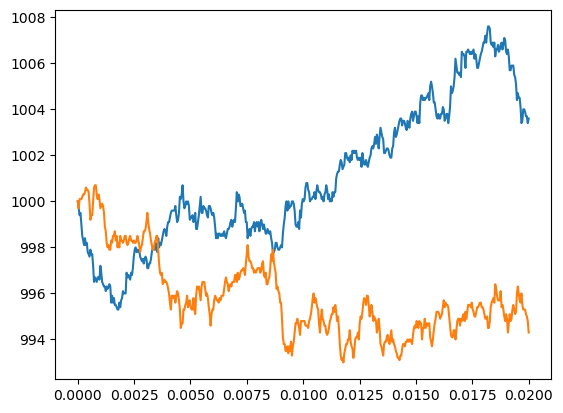

In [45]:
plt.plot(t_ssa, x_ssa)


## Tau-leaping

In [46]:
tau = 0.01  # Leap size

n_runs = 100
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
    
print('Number of steps: ', len(X))

0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed
Number of steps:  3


In [47]:
std_tau = np.std(runs, axis=0)[:,0]

In [48]:
np.mean(runs, axis=0)[:,0]**2 + np.var(runs, axis=0)[:,0]

array([1000000.  , 1000564.15,  999887.13])

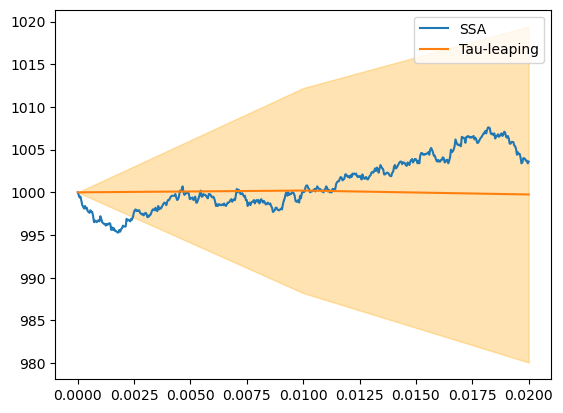

In [49]:
x_tau = np.mean(runs, axis=0)

plt.plot(t_ssa, x_ssa[:,0], label='SSA')
plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.fill_between(t_tau, x_tau[:,0]-std_tau, x_tau[:,0]+std_tau ,alpha=0.3, color='orange')
plt.legend()

## Mean-field

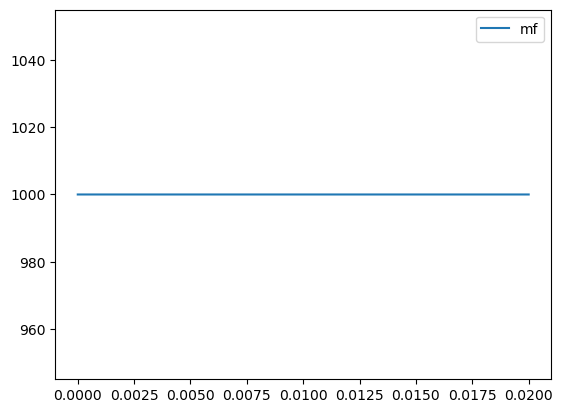

In [50]:

tmf = np.linspace(0,T, 5000)
Xmf = mean_field(drift,S_matrix,c,X0,tmf)

#plt.plot(t_ssa, x_ssa[:,0], label='SSA')
#plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mf')
plt.legend()


## SOGA 

In [56]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/LotkaVolterra.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg)
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

Computed in 0.033s


In [57]:
output_dist

Dist<['state[0]', 'state[1]', 'rabbits[0]', 'rabbits[1]', 'rabbits[2]', 'rabbits[3]', 'foxes[0]', 'foxes[1]', 'foxes[2]', 'foxes[3]', 'tau', 'a1', 'a2', 'a3', 'rate1', 'rate2', 'rate3', 'k1', 'k2', 'k3'],pi: [1.0] mu: [array([9.98534279e+02, 1.00176116e+03, 1.00000000e+03, 1.00000000e+03,
       9.99397486e+02, 9.98534279e+02, 1.00000000e+03, 1.00000000e+03,
       1.00060251e+03, 1.00176116e+03, 1.00000000e-02, 9.99397486e+03,
       9.95818190e+03, 1.00060251e+04, 9.99397486e+01, 9.95818190e+01,
       1.00060251e+02, 4.42104722e+01, 4.50736791e+01, 4.39150331e+01])] sigma: [array([[ 1.23838431e+04, -6.18774461e+03,  0.00000000e+00,
         4.24360103e+03,  8.36543251e+03,  1.23838431e+04,
         0.00000000e+00, -2.12180051e+03, -4.18144731e+03,
        -6.18774461e+03,  0.00000000e+00,  8.36543251e+04,
         4.19154487e+04, -4.18144731e+04,  8.36543251e+02,
         4.19154487e+02, -4.18144731e+02,  2.01211331e+03,
        -2.00629729e+03,  0.00000000e+00],
       [-6.18774461

In [58]:
t = len(t_tau)

x1 = np.zeros(t)
x2 = np.zeros(t)
std1 = np.zeros(t)
std2 = np.zeros(t)

for i in range(t):
    idx1 = output_dist.var_list.index('rabbits[{}]'.format(i))
    idx2 = output_dist.var_list.index('foxes[{}]'.format(i))
    x1[i] = output_dist.gm.mean()[idx1]
    std1[i] = np.sqrt(output_dist.gm.cov()[idx1,idx1])
    x2[i] = output_dist.gm.mean()[idx2]
    std2[i] = np.sqrt(output_dist.gm.cov()[idx2,idx2])

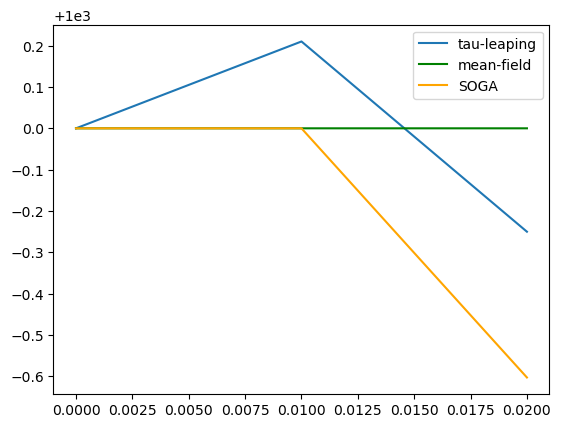

In [59]:
plt.plot(t_tau, x_tau[:,0], label='tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mean-field', color='green')
plt.plot(t_tau, x1, label='SOGA', color='orange')
#plt.fill_between(t_tau, x1-std1, x1+std1 ,alpha=0.3, color='orange')
plt.legend()

In [11]:
pois_mu = 325.4938460168556 
pois_sigma = 2199.1139286691114 
supp = 10

poisson_var(pois_mu, pois_sigma, supp, 'mom1')

([1.0], [nan], [nan])

In [23]:
std_tau

array([0.        , 0.40926764, 0.44676616, 0.57758116, 0.6636264 ,
       0.73484692, 0.77614432, 0.79113842, 0.79617837, 0.86827415,
       0.93680307, 0.94503968, 0.95205042, 0.95262794, 1.00419122,
       1.05337553, 1.05337553, 1.07870292, 1.09343495, 1.08531102,
       1.10140819, 1.11821286, 1.09886305, 1.09745159, 1.10503394,
       1.1017713 , 1.06414285, 1.05692952, 1.10503394, 1.13714555,
       1.14799826, 1.12334322, 1.08830143, 1.04589674, 1.0219589 ,
       1.03319892, 0.98873657, 0.97339612, 0.96041658, 0.95477746,
       0.9591663 , 0.94926287, 1.00019998, 0.9593748 , 0.93696318,
       0.90658701, 0.9       , 0.87057452, 0.86133617, 0.84113019,
       0.8357033 , 0.8842511 , 0.92195445, 0.9283857 , 0.9313968 ,
       0.90465463, 0.94968416, 0.98645831, 0.97652445, 0.98488578,
       0.96015624, 0.89727365, 0.89241246, 0.89241246, 0.81240384,
       0.85293611, 0.8842511 , 0.94106323, 0.91301698, 0.89949986,
       0.91098847, 0.89442719, 0.88876319, 0.9162969 , 0.92146

In [24]:
std1

array([ 0.        ,  0.36055513,  0.51599724,  0.64382892,  0.75831839,
        0.86445664,  0.96467658,  1.06039367,  1.1525382 ,  1.2417851 ,
        1.32866857,  1.41364569,  1.49713501,  1.57954218,  1.6612787 ,
        1.74277733,  1.82450623,  1.90698357,  1.99079392,  2.07660792,
        2.16520704,  2.25751573,  2.35464431,  2.45794775,  2.56910778,
        2.69025073,  2.82412116,  2.97434519,  3.14584399,  3.34550883,
        3.58335484,  3.87460243,  4.24367857,  4.73245576,  5.41777399,
        6.43824142,  7.91476261,  9.53865238, 10.98805817, 10.9760386 ,
       10.97027323, 10.967259  , 10.96067326, 10.95404975, 10.94708907,
       10.93964255, 10.9316355 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      